In [1]:
import numpy as np
import pymc as pm
import arviz as az

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
import  matplotlib.pyplot as plt

In [23]:
from scipy import stats

In [2]:
X = np.array([1,0,0,1,0])

In [10]:
model = pm.Model()

with model:
    p = pm.Uniform('p', lower=0.0, upper=1.0)
    
    X_obs = pm.Binomial('X_obs', p=p, n=50, observed=20)

In [11]:
with model:
    idata1_1 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


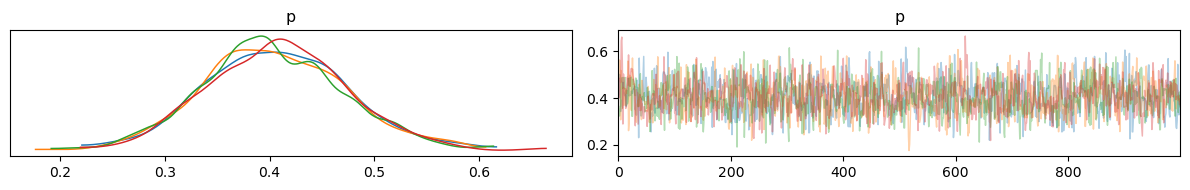

In [13]:
az.plot_trace(idata1_1, compact=False)
plt.tight_layout();

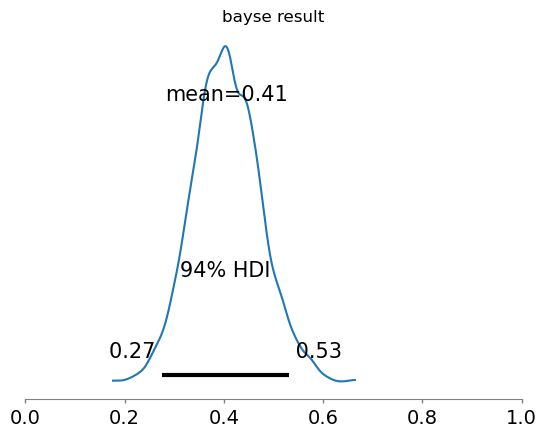

In [14]:
ax = az.plot_posterior(idata1_1)
ax.set_xlim(0,1)
ax.set_title('bayse result');

In [16]:
summary1_1 = az.summary(idata1_1)
display(summary1_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.406,0.068,0.275,0.531,0.002,0.001,1828.0,2909.0,1.0


In [19]:
model2 =pm.Model()

with model2:
    p = pm.Uniform('p', lower=0.1, upper=0.9)
    
    X_obs = pm.Binomial('X_obs', p=p, n=5, observed=2)
    
    idata1_2 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


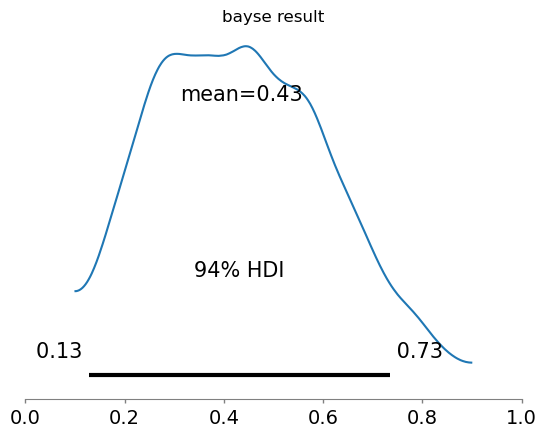

In [20]:
ax = az.plot_posterior(idata1_2)
ax.set_xlim(0,1)
ax.set_title('bayse result');

In [21]:
summary1_2 = az.summary(idata1_2)
display(summary1_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.435,0.17,0.128,0.734,0.005,0.003,1344.0,1622.0,1.0


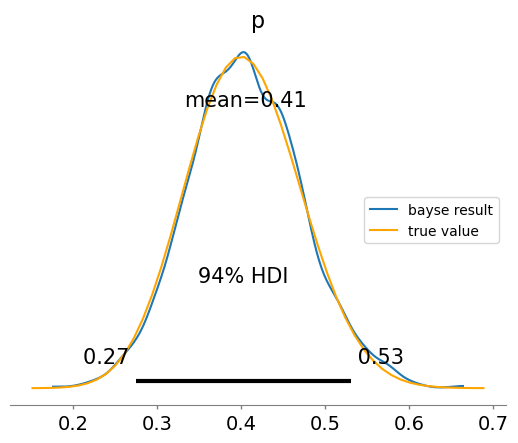

In [28]:
alpha = 20 + 1
beta = 30 + 1
true_beta = stats.beta(alpha, beta)

ax = az.plot_posterior(idata1_1)
ax.lines[0].set_label('bayse result')

x=np.linspace(*ax.get_xlim())
ax.plot(x, true_beta.pdf(x), color='orange', label='true value')
ax.legend(loc='center right');
